# Installing Albumentation Package and Linking to Library Modules

In [0]:
!pip install --no-cache-dir git+https://github.com/albu/albumentations > /dev/null && echo "Albumentation library is successfully installed!"
!git clone https://github.com/srilakshmiv14/EVA4-Session-8-Library
import sys
sys.path.append("EVA4-Session-8-Library/")

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-v76tij4k
Albumentation library is successfully installed!
fatal: destination path 'EVA4-Session-8-Library' already exists and is not an empty directory.


In [0]:
! git clone https://github.com/seshuad/IMagenet

fatal: destination path 'IMagenet' already exists and is not an empty directory.


# Importing Necessary Modules to run the Code

In [0]:
import torch
import evadatatransforms
from evadatatransforms import AlbumentationTransforms
import eva4model
import eva4resnet
import modelstats
import modeltrainer
import train_test
from gradcam import GRADCAM, PLOT
import tinyimagenet


# Train and Test Transformations

In [0]:
import albumentations as A
import numpy as np

channel_means = (0.48043839, 0.44820218, 0.39760034)
channel_stdevs = (0.27698959, 0.26908774, 0.28216029)
train_transforms = AlbumentationTransforms([
                                       A.PadIfNeeded(min_height=80, min_width=80),
                                       A.RandomCrop(64,64, always_apply=True),
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=1, max_h_size=24, max_w_size=24) # fillvalue is 0 after normalizing as mean is 0
                                       ])

fillmeans = (np.array(channel_means)).astype(np.uint8)
test_transforms = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])



# Load and Split Datasets

In [0]:
from evadatasets import tinyimagenet

dataset, class_names = tinyimagenet.alldata('IMagenet/tiny-imagenet-200/')
trainlen = int(len(dataset)*0.7)
train_dataset = tinyimagenet.TinyImagenetDataset(dataset[:trainlen], transform=train_transforms)
test_dataset= tinyimagenet.TinyImagenetDataset(dataset[trainlen:], transform=test_transforms)

In [0]:
import dataloaders
batch_size = 256 

dataloader = dataloaders.DataLoader(batch_size=batch_size, shuffle = True)

# train dataloader
train_loader = dataloader.load(train_dataset)

# test dataloader
test_loader = dataloader.load(test_dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([256, 3, 64, 64])
torch.Size([256])
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


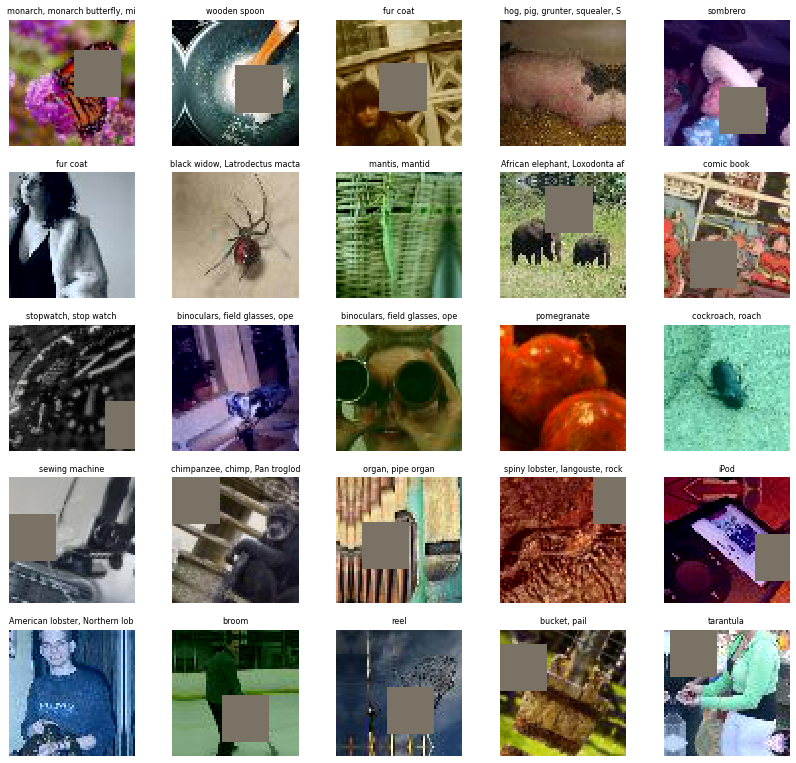

In [0]:
from __future__ import print_function
def unnormalize(img):
  img = img.cpu().numpy().astype(dtype=np.float32)
  print(img.shape)
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)

images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = len(class_names)
r, c = 5, 5
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.01, wspace=0.3)
for i in range(r):
  for j in range(c):
    idx = i*c + j
    ax = plt.subplot(r, c, idx+1)
    ax.set_title(class_names[labels[idx]][:30], fontdict={'fontsize': 8})
    plt.axis('off')
    ax.imshow(unnormalize(images[idx]), interpolation='none')
plt.show()

# Model Summary

In [0]:
from eva4resnet import ResNet18 #Updated Resnet18 (for image size 64*64*3)
import torch
model = ResNet18(num_classes=len(class_names)) #Assigned length of classes equal to Number of Classes 
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
model.summary((3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

# Train and Test the Model

In [0]:
import torch.optim as optim
import torch.nn as nn
L1lambda = 0
L2lambda = 1e-4
EPOCHS = 50
max_lr=1
optimizer = optim.SGD(model.parameters(), lr=max_lr/10, momentum=0.9, nesterov=True, weight_decay=L2lambda)

scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=max_lr, steps_per_epoch=int(len(train_loader))+1, epochs=EPOCHS,  pct_start=0.2, div_factor=10, final_div_factor=100 )
print("Initial LR- ",scheduler.get_lr())
print("Total steps - ", scheduler.total_steps)
print("No.of steps to increase LR -", scheduler.step_size_up)
print("No.of steps to reduce LR - ", scheduler.step_size_down)

model.gotrain(optimizer, train_loader, test_loader, EPOCHS, "/content/drive/My Drive", scheduler, True,L1lambda)


Initial LR-  [0.09999999999999998]
Total steps -  15100
No.of steps to increase LR - 3019.0
No.of steps to reduce LR -  12080.0



Validation loss decreased (100000.000000 --> 3.741700).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0160, Accuracy: 12.44%; Test set: Average loss: 3.7417, Accuracy: 17.38%
Learning Rate = 0.121895



Validation loss decreased (3.741700 --> 3.429924).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0145, Accuracy: 18.01%; Test set: Average loss: 3.4299, Accuracy: 22.79%
Learning Rate = 0.185448



Validation loss decreased (3.429924 --> 3.339387).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0133, Accuracy: 23.01%; Test set: Average loss: 3.3394, Accuracy: 24.42%
Learning Rate = 0.284475



Validation loss decreased (3.339387 --> 3.209437).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0124, Accuracy: 27.52%; Test set: Average loss: 3.2094, Accuracy: 26.92%
Learning Rate = 0.409340



Validation loss decreased (3.209437 --> 3.024426).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0116, Accuracy: 31.20%; Test set: Average loss: 3.0244, Accuracy: 30.92%
Learning Rate = 0.547893



Epoch: 6, Train set: Average loss: 0.0110, Accuracy: 34.17%; Test set: Average loss: 3.0829, Accuracy: 29.63%
Learning Rate = 0.686651



Validation loss decreased (3.024426 --> 2.990951).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0105, Accuracy: 36.15%; Test set: Average loss: 2.9910, Accuracy: 32.49%
Learning Rate = 0.812111



Validation loss decreased (2.990951 --> 2.966937).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0102, Accuracy: 37.92%; Test set: Average loss: 2.9669, Accuracy: 33.18%
Learning Rate = 0.912066



Validation loss decreased (2.966937 --> 2.890140).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0099, Accuracy: 39.44%; Test set: Average loss: 2.8901, Accuracy: 34.34%
Learning Rate = 0.976788



Epoch: 10, Train set: Average loss: 0.0096, Accuracy: 40.97%; Test set: Average loss: 2.9206, Accuracy: 33.93%
Learning Rate = 0.999980



Validation loss decreased (2.890140 --> 2.711354).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0094, Accuracy: 42.30%; Test set: Average loss: 2.7114, Accuracy: 37.63%
Learning Rate = 0.998560



Validation loss decreased (2.711354 --> 2.622734).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0092, Accuracy: 43.30%; Test set: Average loss: 2.6227, Accuracy: 39.41%
Learning Rate = 0.994072



Validation loss decreased (2.622734 --> 2.613696).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0090, Accuracy: 44.07%; Test set: Average loss: 2.6137, Accuracy: 39.03%
Learning Rate = 0.986560



Epoch: 14, Train set: Average loss: 0.0089, Accuracy: 44.90%; Test set: Average loss: 3.0324, Accuracy: 34.68%
Learning Rate = 0.976072



Epoch: 15, Train set: Average loss: 0.0087, Accuracy: 45.78%; Test set: Average loss: 3.1701, Accuracy: 32.43%
Learning Rate = 0.962671



Epoch: 16, Train set: Average loss: 0.0086, Accuracy: 46.57%; Test set: Average loss: 2.8404, Accuracy: 36.93%
Learning Rate = 0.946439



Epoch: 17, Train set: Average loss: 0.0084, Accuracy: 47.32%; Test set: Average loss: 3.1812, Accuracy: 33.87%
Learning Rate = 0.927476



Epoch: 18, Train set: Average loss: 0.0083, Accuracy: 47.97%; Test set: Average loss: 3.4368, Accuracy: 27.95%
Learning Rate = 0.905898



Epoch: 19, Train set: Average loss: 0.0082, Accuracy: 48.31%; Test set: Average loss: 2.6412, Accuracy: 41.37%
Learning Rate = 0.881837



Validation loss decreased (2.613696 --> 2.464738).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0081, Accuracy: 48.80%; Test set: Average loss: 2.4647, Accuracy: 42.58%
Learning Rate = 0.855441



Validation loss decreased (2.464738 --> 2.464383).  Saving model ...
Epoch: 21, Train set: Average loss: 0.0080, Accuracy: 49.45%; Test set: Average loss: 2.4644, Accuracy: 43.96%
Learning Rate = 0.826870



Validation loss decreased (2.464383 --> 2.431052).  Saving model ...
Epoch: 22, Train set: Average loss: 0.0079, Accuracy: 49.85%; Test set: Average loss: 2.4311, Accuracy: 43.32%
Learning Rate = 0.796301



Epoch: 23, Train set: Average loss: 0.0078, Accuracy: 50.33%; Test set: Average loss: 2.4579, Accuracy: 44.16%
Learning Rate = 0.763920



Epoch: 24, Train set: Average loss: 0.0077, Accuracy: 51.18%; Test set: Average loss: 2.6352, Accuracy: 40.35%
Learning Rate = 0.729926



Epoch: 25, Train set: Average loss: 0.0076, Accuracy: 51.73%; Test set: Average loss: 2.4476, Accuracy: 42.38%
Learning Rate = 0.694527



Epoch: 26, Train set: Average loss: 0.0075, Accuracy: 52.07%; Test set: Average loss: 2.5258, Accuracy: 43.41%
Learning Rate = 0.657939



Epoch: 27, Train set: Average loss: 0.0074, Accuracy: 52.82%; Test set: Average loss: 2.4786, Accuracy: 43.49%
Learning Rate = 0.620387



Validation loss decreased (2.431052 --> 2.363408).  Saving model ...
Epoch: 28, Train set: Average loss: 0.0072, Accuracy: 53.61%; Test set: Average loss: 2.3634, Accuracy: 46.40%
Learning Rate = 0.582101



Epoch: 29, Train set: Average loss: 0.0071, Accuracy: 54.32%; Test set: Average loss: 2.5400, Accuracy: 43.50%
Learning Rate = 0.543315



Epoch: 30, Train set: Average loss: 0.0070, Accuracy: 54.85%; Test set: Average loss: 2.9538, Accuracy: 38.36%
Learning Rate = 0.504267



Epoch: 31, Train set: Average loss: 0.0069, Accuracy: 55.79%; Test set: Average loss: 2.4194, Accuracy: 44.86%
Learning Rate = 0.465196



Validation loss decreased (2.363408 --> 2.338982).  Saving model ...
Epoch: 32, Train set: Average loss: 0.0067, Accuracy: 56.64%; Test set: Average loss: 2.3390, Accuracy: 47.65%
Learning Rate = 0.426341



Validation loss decreased (2.338982 --> 2.210847).  Saving model ...
Epoch: 33, Train set: Average loss: 0.0065, Accuracy: 57.66%; Test set: Average loss: 2.2108, Accuracy: 49.37%
Learning Rate = 0.387940



Epoch: 34, Train set: Average loss: 0.0063, Accuracy: 58.63%; Test set: Average loss: 2.2139, Accuracy: 48.52%
Learning Rate = 0.350229



Epoch: 35, Train set: Average loss: 0.0062, Accuracy: 59.51%; Test set: Average loss: 2.2821, Accuracy: 48.99%
Learning Rate = 0.313438



Validation loss decreased (2.210847 --> 2.153692).  Saving model ...
Epoch: 36, Train set: Average loss: 0.0059, Accuracy: 60.65%; Test set: Average loss: 2.1537, Accuracy: 50.68%
Learning Rate = 0.277792



Validation loss decreased (2.153692 --> 2.079398).  Saving model ...
Epoch: 37, Train set: Average loss: 0.0057, Accuracy: 62.04%; Test set: Average loss: 2.0794, Accuracy: 52.02%
Learning Rate = 0.243511



Epoch: 38, Train set: Average loss: 0.0054, Accuracy: 63.93%; Test set: Average loss: 2.1533, Accuracy: 50.91%
Learning Rate = 0.210803



Epoch: 39, Train set: Average loss: 0.0051, Accuracy: 65.59%; Test set: Average loss: 2.0890, Accuracy: 52.57%
Learning Rate = 0.179870



Epoch: 40, Train set: Average loss: 0.0048, Accuracy: 67.66%; Test set: Average loss: 2.1400, Accuracy: 52.32%
Learning Rate = 0.150901



Epoch: 41, Train set: Average loss: 0.0044, Accuracy: 69.69%; Test set: Average loss: 2.0815, Accuracy: 53.80%
Learning Rate = 0.124072



Validation loss decreased (2.079398 --> 1.954217).  Saving model ...
Epoch: 42, Train set: Average loss: 0.0040, Accuracy: 72.63%; Test set: Average loss: 1.9542, Accuracy: 56.45%
Learning Rate = 0.099549



Epoch: 43, Train set: Average loss: 0.0035, Accuracy: 75.62%; Test set: Average loss: 1.9960, Accuracy: 57.43%
Learning Rate = 0.077482



Validation loss decreased (1.954217 --> 1.937259).  Saving model ...
Epoch: 44, Train set: Average loss: 0.0030, Accuracy: 78.87%; Test set: Average loss: 1.9373, Accuracy: 58.50%
Learning Rate = 0.058006



Validation loss decreased (1.937259 --> 1.870011).  Saving model ...
Epoch: 45, Train set: Average loss: 0.0025, Accuracy: 82.13%; Test set: Average loss: 1.8700, Accuracy: 59.93%
Learning Rate = 0.041240



Validation loss decreased (1.870011 --> 1.829984).  Saving model ...
Epoch: 46, Train set: Average loss: 0.0021, Accuracy: 85.49%; Test set: Average loss: 1.8300, Accuracy: 61.06%
Learning Rate = 0.027286



Validation loss decreased (1.829984 --> 1.815178).  Saving model ...
Epoch: 47, Train set: Average loss: 0.0017, Accuracy: 88.41%; Test set: Average loss: 1.8152, Accuracy: 61.59%
Learning Rate = 0.016231



Validation loss decreased (1.815178 --> 1.801144).  Saving model ...
Epoch: 48, Train set: Average loss: 0.0015, Accuracy: 90.13%; Test set: Average loss: 1.8011, Accuracy: 62.26%
Learning Rate = 0.008142



Validation loss decreased (1.801144 --> 1.782681).  Saving model ...
Epoch: 49, Train set: Average loss: 0.0013, Accuracy: 91.63%; Test set: Average loss: 1.7827, Accuracy: 62.30%
Learning Rate = 0.003068



Epoch: 50, Train set: Average loss: 0.0012, Accuracy: 92.06%; Test set: Average loss: 1.7864, Accuracy: 62.35%
Learning Rate = 0.001041



# Plotting Training and Test Accuracy

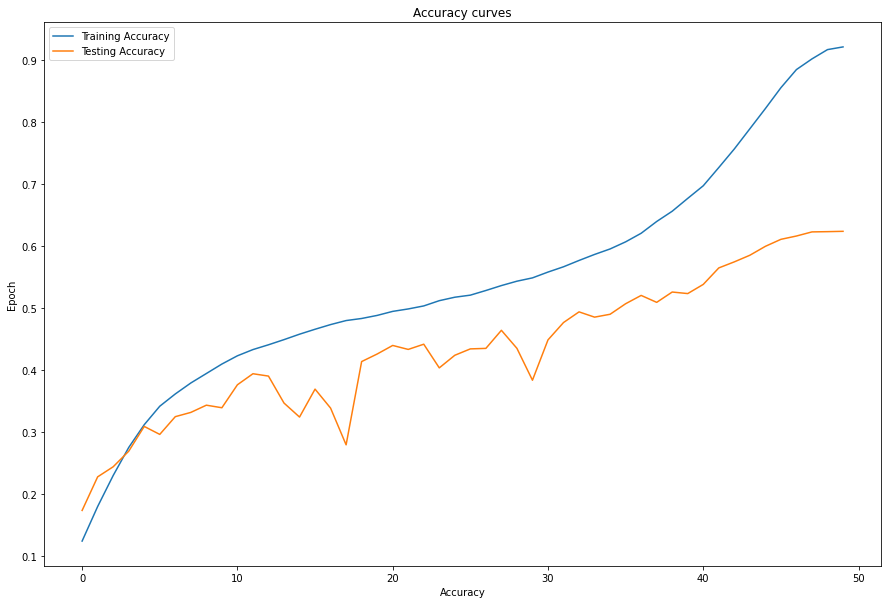

In [0]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
ax.plot(model.stats().train_acc)
ax.plot(model.stats().test_acc)

ax.set(title="Accuracy curves", xlabel="Accuracy", ylabel="Epoch")
ax.legend(['Training Accuracy', 'Testing Accuracy'], loc='best')
plt.savefig("TrainTestAccuracy.png")
plt.show()

## Plotting Gradcam 

torch.Size([256, 3, 64, 64])
torch.Size([10, 200])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


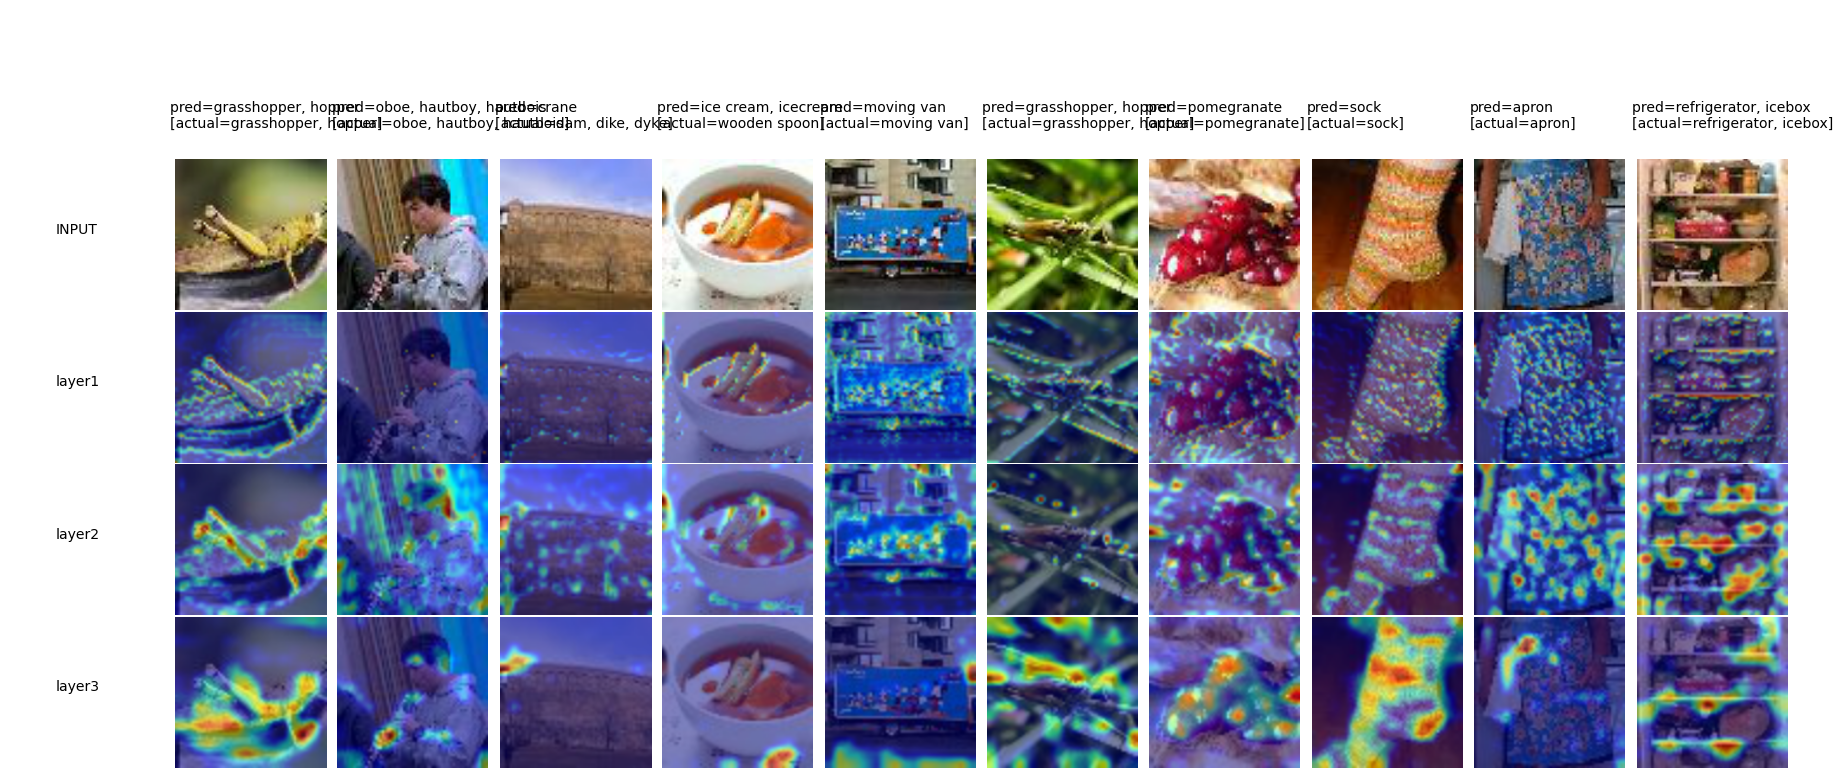

In [0]:
from gradcam import GRADCAM, PLOT
target_layers = ["layer1", "layer2", "layer3"]

dataiter = iter(test_loader)
images, labels = dataiter.next()
print(images.shape)
#Gradcam plot for first 10 misclassified images
gradcam_output, probs, predicted_classes = GRADCAM(list(images[:10]), labels[:10], model, target_layers)
PLOT(gradcam_output, list(images[:10]), labels[:10], target_layers, class_names, (3, 64, 64), predicted_classes, unnormalize)

***Submiited By G Uday Kiran and V Srilakshmi***